# Vector Calculus Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym

#Problem 1

<img src="Q1.png">

# 

In [2]:
# Problem 1

t = sym.symbols('t')

x = 4*sym.cos(t)
y = 4*sym.sin(t)

function = x**2 - y**2
print('The function is: ')
sym.pprint(function.simplify())

integral = sym.integrate(function, (t, 0, 2*sym.pi))

print('The integral is: ')
sym.pprint(integral.simplify())

The function is: 
16⋅cos(2⋅t)
The integral is: 
0


# Problem 2

<img src="Q2.png">

The function is: 
r
The integral is: 
8⋅π
───
 3 


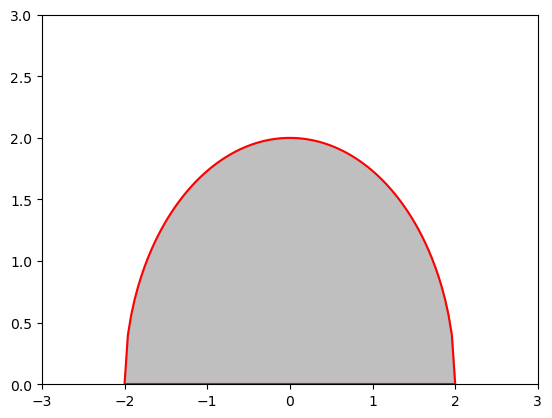

In [3]:
# Problem 2

r = sym.symbols('r', positive=True)
theta = sym.symbols('theta')

x = r*sym.cos(theta)
y = r*sym.sin(theta)

function = sym.sqrt(x**2 + y**2)
print('The function is: ')
sym.pprint(function.simplify())

# limits of integration: draw the region
xregion = np.linspace(-2, 2, 100)
yregion_upper = np.sqrt(4 - xregion**2)
yregion_lower = 0*xregion

plt.plot(xregion, yregion_upper, 'r')
plt.plot(xregion, yregion_lower, 'r')
plt.fill_between(xregion, yregion_upper, yregion_lower, color='gray', alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(0, 3)

r_lower_limit = 0
r_upper_limit = 2
theta_lower_limit = 0
theta_upper_limit = sym.pi

integral = sym.integrate(r*function, (r, r_lower_limit, r_upper_limit), (theta, theta_lower_limit, theta_upper_limit))

print('The integral is: ')
sym.pprint(integral.simplify())

# Problem 3

<img src="Q3.png">

In [4]:
# Problem 3

r = sym.symbols('r', positive=True)
theta = sym.symbols('theta')

x = r*sym.cos(theta)
y = r*sym.sin(theta)

function = x+y

r_lower_limit = 4*sym.sin(theta)
r_upper_limit = 4
theta_lower_limit = 0
theta_upper_limit = sym.pi/2

integral = sym.integrate(r*function, (r, r_lower_limit, r_upper_limit), (theta, theta_lower_limit, theta_upper_limit))

print('The integral is: ')
sym.pprint(integral.simplify())

The integral is: 
112/3 - 4⋅π


# Problem 4

<img src="Q4.png">

The integral is: 
48


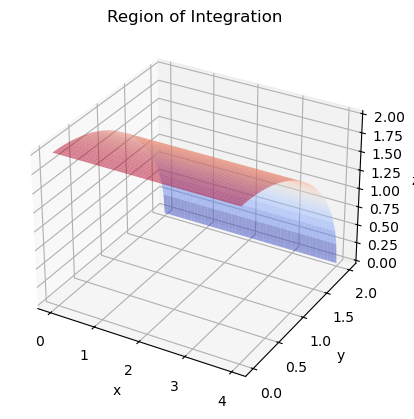

In [5]:
# Problem 4
#%matplotlib notebook

# Define the region
x = np.linspace(0, 4, 100)
y = np.linspace(0, 2, 100)
z = np.sqrt(4 - y**2)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
Z = np.sqrt(4 - Y**2)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Region of Integration')

# Over the surface, the normal vector is (0, cos(theta), sin(theta)), where theta varies from 0 to pi/2

# Over the surface, the function is (x,5z,y) = (x,5*2*sin(theta),2*cos(theta))

# Thus, F.dot.nhat = 0 + 10*sin(theta)*cos(theta) + 2*cos(theta)*sin(theta) = 12*sin(theta)*cos(theta)

# The differential area is r*dx*dtheta = 2*dx*dtheta

theta = sym.symbols('theta')
x = sym.symbols('x')

integral = sym.integrate(24*sym.sin(theta)*sym.cos(theta), (x,0,4), (theta, 0, sym.pi/2))

print('The integral is: ')
sym.pprint(integral.simplify())

# Problem 5

<img src="Q5.png">

The sub-integrals are: 
-25⋅π
-25⋅π
0
The integral is: 
-50⋅π


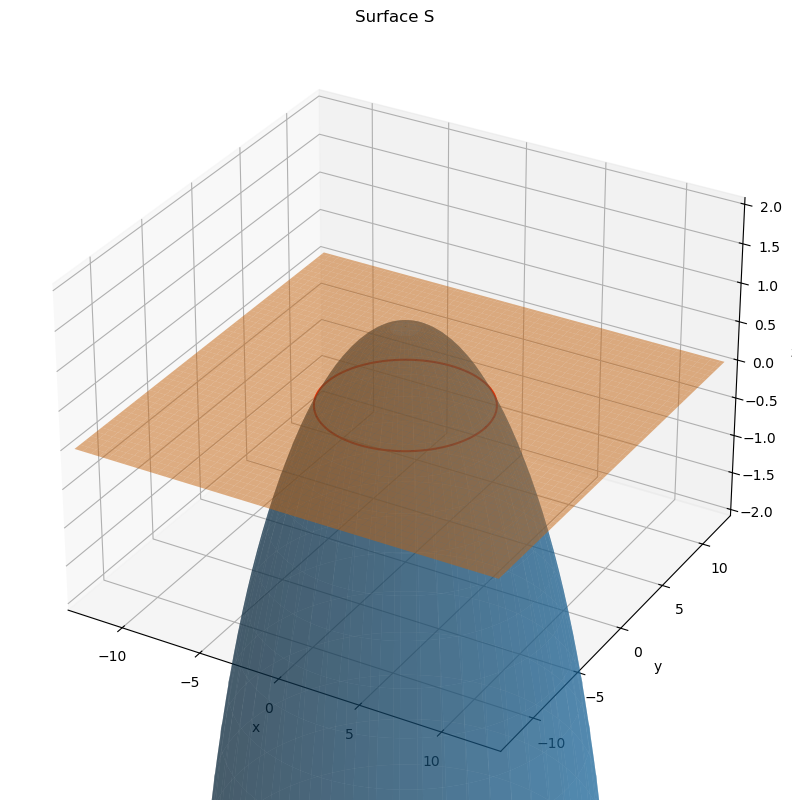

In [8]:
# Problem 5

# Stokes Theorem states that the line integral of a vector field F around a closed curve C is equal to the surface integral of the curl of F over the surface S enclosed by C.  So, for this problem, the point is to evaluate the line integral of F around the curve C, as presumably that is easier.

# Let's begin by drawing the surface and the curve

#%matplotlib notebook

# Define the region
radius_square = 169
offset = 12

npts = 100

def r(r, phi, theta, offset):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)-offset
    return x, y, z

# Plot the surface
phi = np.linspace(0, 2*np.pi, npts)
theta = np.linspace(0, np.pi, npts)
radius = np.sqrt(radius_square)
Phi, Theta = np.meshgrid(phi, theta)
X, Y, Z = r(radius, Phi, Theta, offset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface S')

# Plot the z=0 plane
x = np.linspace(-13, 13, npts)
y = np.linspace(-13, 13, npts)
X, Y = np.meshgrid(x, y)
Z = 0*X
ax.plot_surface(X, Y, Z, alpha=0.5)

# Plot the curve
theta = np.linspace(0, 2*np.pi, npts)
new_radius = np.sqrt(radius_square - offset**2)
xint = new_radius*np.cos(theta)
yint = new_radius*np.sin(theta)

ax.plot(xint, yint, 0*x, 'r')

ax.set_xlim(-13, 13)
ax.set_ylim(-13, 13)
ax.set_zlim(-2, 2)

# Evaluate the line integral of F around the curve C

# subsituting z = 0, we get x^2 + y^2 = 169-144= 25, so the curve is a circle of radius 5 centered at the origin in the z=0 plane

# The curve is a circle of radius 5, centered at the origin, in the z=0 plane. So, on this curve, x = 5*cos(theta), y = 5*sin(theta), z = 0, where theta varies from 0 to 2*pi

# The dr vector is (-5*sin(theta), 5*cos(theta), 0)

# The F vector is (y, y-x, 0) = (5*sin(theta), 5*cos(theta)-5*sin(theta), 0)

# The dot product of F and dr is -25*sin(theta)*sin(theta) + 25*cos(theta)*cos(theta) - 25*cos(theta)*sin(theta)

theta = sym.symbols('theta')

integral1 = sym.integrate(-25*sym.sin(theta)*sym.sin(theta), (theta, 0, 2*sym.pi))

integral2 = sym.integrate(-25*sym.cos(theta)*sym.cos(theta), (theta, 0, 2*sym.pi))

integral3 = sym.integrate(-25*sym.cos(theta)*sym.sin(theta), (theta, 0, 2*sym.pi))

print('The sub-integrals are: ')
sym.pprint(integral1.simplify())
sym.pprint(integral2.simplify())
sym.pprint(integral3.simplify())

integral = integral1 + integral2 + integral3

print('The integral is: ')
sym.pprint(integral.simplify())



# Problem 6

<img src="Q6.png">

The integral is: 
40.5⋅π
The volume of the overlap region is: 
81.0⋅π


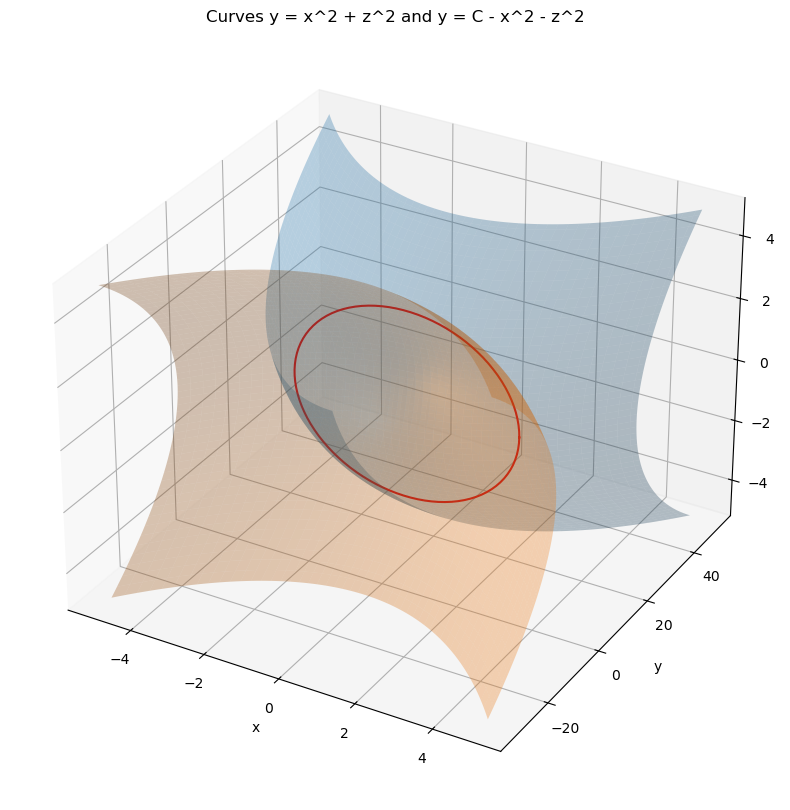

In [9]:
# Problem 6

# The original curves are:
# y = x^2 + z^2
# y = C - x^2 - z^2
#
# where C is a constant
#
# These curves are called parabloids, and they are symmetric about the y-axis. 

C = 18
x = sym.symbols('x')
z = sym.symbols('z')

y1 = x**2 + z**2
y2 = C - x**2 - z**2

# The intersection points are the solutions to the system of equations:

# x^2 + z^2 = C - x^2 - z^2
# 2*x^2 + 2*z^2 = C
# x^2 + z^2 = C/2

# So, the intersection points are the points on the circle of radius sqrt(C/2) centered at the origin
# at the intersection of the plane y = C/2 and the paraboloid y = x^2 + z^2

# Let's plot the curves and the intersection points

# Define the region
x = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)
X, Z = np.meshgrid(x, z)
Y1 = X**2 + Z**2
Y2 = C - X**2 - Z**2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y1, Z, alpha=0.3)
ax.plot_surface(X, Y2, Z, alpha=0.3)

# Plot the intersection points
theta = np.linspace(0, 2*np.pi, 100)
xint = np.sqrt(C/2)*np.cos(theta)
zint = np.sqrt(C/2)*np.sin(theta)

ax.plot(xint, C/2*np.ones(100), zint, 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Curves y = x^2 + z^2 and y = C - x^2 - z^2')

# We can see that the overlap region of two curves is symmetric, and so we can just find the volume  of one half of the overlap region and multiply by 2

# Let's find the volume of the paraboloid y = x^2 + z^2 between y = 0 and y = C/2, since that seems easier

# The volume is given by the triple integral of 1 over the region

# The easiest method here is to add up the volume of a series of disks of thickness dy, where y varies from 0 to C/2

# The volume of each disk is pi*(r(y)^2)*dy, where r(y) is the radius of the disk at height y, which is sqrt(y).  

# So, the volume is the integral of pi*y dy from 0 to C/2

y = sym.symbols('y')

integral = sym.integrate(sym.pi*y, (y, 0, C/2))

print('The integral is: ')
sym.pprint(integral.simplify())

# The volume of the overlap region is 2*integral

print('The volume of the overlap region is: ')
sym.pprint(2*integral.simplify())